# Importing Libraries and Dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.metrics import roc_auc_score, roc_curve
from catboost import CatBoostClassifier

In [2]:
# Load the dataset
df_train = pd.read_csv(r"C:\Users\ACER\Downloads\playground-series-s4e7\train.csv", index_col='id')
df_test = pd.read_csv(r"C:\Users\ACER\Downloads\playground-series-s4e7\test.csv", index_col='id')

In [3]:
df_train.head()

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
id,,,,,,,,,,,
0,Male,21,1,35.0,0,1-2 Year,Yes,65101.0,124.0,187,0
1,Male,43,1,28.0,0,> 2 Years,Yes,58911.0,26.0,288,1
2,Female,25,1,14.0,1,< 1 Year,No,38043.0,152.0,254,0
3,Female,35,1,1.0,0,1-2 Year,Yes,2630.0,156.0,76,0
4,Female,36,1,15.0,1,1-2 Year,No,31951.0,152.0,294,0


# Preprocessing and Data Splitting

In [4]:
# Define function to convert data types
def converting_datatypes(df):
    df = df.copy()
    try:
        df['Gender'] = df['Gender'].astype('category')
        df['Vehicle_Age'] = df['Vehicle_Age'].astype('category')
        df['Vehicle_Damage'] = df['Vehicle_Damage'].astype('category')
        df['Age'] = df['Age'].astype('int8')
        df['Driving_License'] = df['Driving_License'].astype('category')
        df['Region_Code'] = df['Region_Code'].astype('int8')
        df['Previously_Insured'] = df['Previously_Insured'].astype('category')
        df['Annual_Premium'] = df['Annual_Premium'].astype('int32')
        df['Policy_Sales_Channel'] = df['Policy_Sales_Channel'].astype('int16')
        df['Vintage'] = df['Vintage'].astype('int16')
        df['Response'] = df['Response'].astype('int8')
        print(df.info(memory_usage='deep'))
    except KeyError as e:
        print(f"Error: {e} not found in DataFrame")
    except Exception as e:
        print(f"An error occurred: {e}")
    return df

In [5]:
df_train = converting_datatypes(df_train)

<class 'pandas.core.frame.DataFrame'>
Index: 11504798 entries, 0 to 11504797
Data columns (total 11 columns):
 #   Column                Dtype   
---  ------                -----   
 0   Gender                category
 1   Age                   int8    
 2   Driving_License       category
 3   Region_Code           int8    
 4   Previously_Insured    category
 5   Vehicle_Age           category
 6   Vehicle_Damage        category
 7   Annual_Premium        int32   
 8   Policy_Sales_Channel  int16   
 9   Vintage               int16   
 10  Response              int8    
dtypes: category(5), int16(2), int32(1), int8(3)
memory usage: 263.3 MB
None


In [6]:
# Define numerical and categorical pipelines
numerical_pipeline = Pipeline([
    ('scalar', StandardScaler())
])

categorical_pipeline = Pipeline([
    ('onehot', OneHotEncoder())
])

preprocessor = ColumnTransformer([
    ('numeric', numerical_pipeline, ['Age',	'Region_Code',	'Annual_Premium',	'Policy_Sales_Channel',	'Vintage']),
    ('categoric', categorical_pipeline, ['Gender', 'Driving_License', 'Previously_Insured', 'Vehicle_Age', 'Vehicle_Damage'])
])

In [7]:
# Define the model pipeline
pipeline_catboost = Pipeline([
    ('prep', preprocessor),
    ('algo', CatBoostClassifier())
])

In [8]:
# Split the training data
X = df_train.drop(columns='Response')
y = df_train['Response']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the Model

In [9]:
# Fit the model
pipeline_catboost.fit(X_train, y_train)

Learning rate set to 0.5
0:	learn: 0.2987243	total: 1.2s	remaining: 19m 56s
1:	learn: 0.2735083	total: 1.96s	remaining: 16m 18s
2:	learn: 0.2685689	total: 2.68s	remaining: 14m 51s
3:	learn: 0.2662971	total: 3.51s	remaining: 14m 33s
4:	learn: 0.2652546	total: 4.2s	remaining: 13m 55s
5:	learn: 0.2639522	total: 4.94s	remaining: 13m 38s
6:	learn: 0.2630055	total: 5.68s	remaining: 13m 25s
7:	learn: 0.2626634	total: 6.3s	remaining: 13m 1s
8:	learn: 0.2621554	total: 7s	remaining: 12m 50s
9:	learn: 0.2618846	total: 7.8s	remaining: 12m 51s
10:	learn: 0.2616061	total: 8.5s	remaining: 12m 44s
11:	learn: 0.2613648	total: 9.29s	remaining: 12m 45s
12:	learn: 0.2611319	total: 10.1s	remaining: 12m 43s
13:	learn: 0.2608972	total: 10.8s	remaining: 12m 40s
14:	learn: 0.2606706	total: 11.5s	remaining: 12m 32s
15:	learn: 0.2605314	total: 12.2s	remaining: 12m 32s
16:	learn: 0.2603667	total: 13s	remaining: 12m 29s
17:	learn: 0.2602490	total: 13.7s	remaining: 12m 25s
18:	learn: 0.2600285	total: 14.5s	remainin

Pipeline(steps=[('prep',
                 ColumnTransformer(transformers=[('numeric',
                                                  Pipeline(steps=[('scalar',
                                                                   StandardScaler())]),
                                                  ['Age', 'Region_Code',
                                                   'Annual_Premium',
                                                   'Policy_Sales_Channel',
                                                   'Vintage']),
                                                 ('categoric',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder())]),
                                                  ['Gender', 'Driving_License',
                                                   'Previously_Insured',
                                                   'Vehicle_Age',
                                                   'Vehicle_Damage'])])),
                ('algo',
                 <catboost.core.CatBoostClassifier object at 0x000001A5BC1FDC90>)])

In [10]:
# Predict probabilities on the test set
X_test_transformed = pipeline_catboost.named_steps['prep'].transform(X_test)
y_test_pred_proba = pipeline_catboost.named_steps['algo'].predict_proba(X_test_transformed)[:, 1]

# Evaluation with ROC AUC Score

In [11]:
# Evaluate with ROC AUC Score
roc_auc = roc_auc_score(y_test, y_test_pred_proba)
print(f'ROC AUC Score: {roc_auc:.4f}')

ROC AUC Score: 0.8808


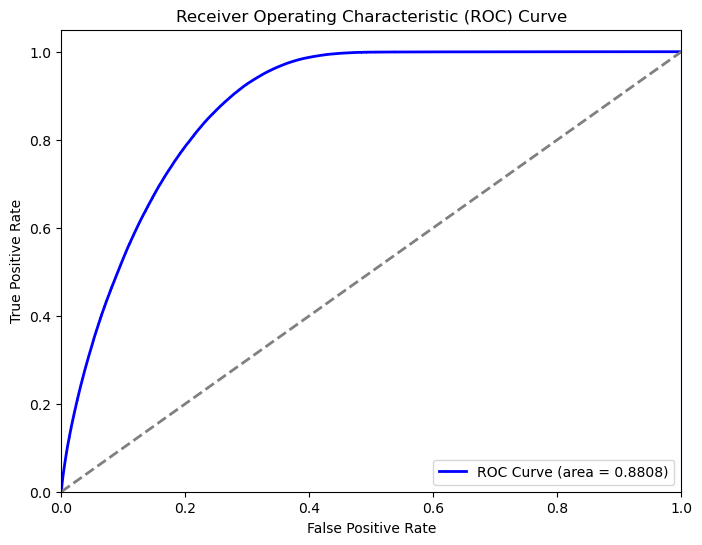

In [12]:
# Calculate and Visualize ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_test_pred_proba)

# Plot ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC Curve (area = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

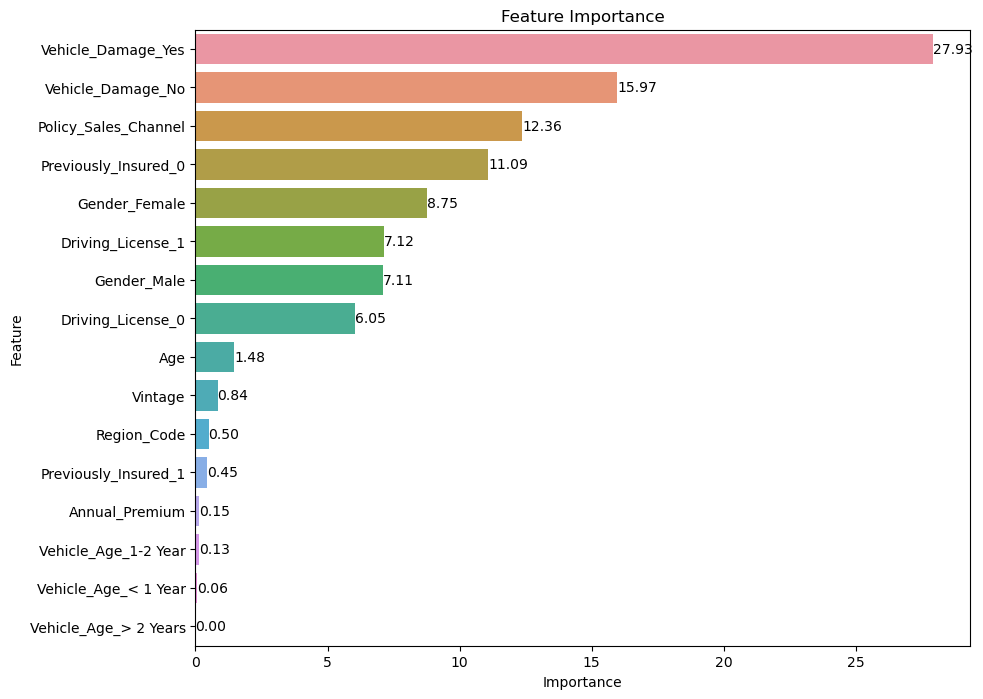

In [18]:
# Display feature importance

catboost_model = pipeline_catboost.named_steps['algo']
feature_importances = catboost_model.get_feature_importance()
feature_names = (pipeline_catboost.named_steps['prep'].named_transformers_['categoric'].named_steps['onehot'].get_feature_names_out().tolist() + 
                 pipeline_catboost.named_steps['prep'].named_transformers_['numeric'].feature_names_in_.tolist())

feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 8))
ax = sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Feature Importance')

# Add labels to the bars
for i in ax.containers:
    ax.bar_label(i, fmt='%.2f')

plt.show()

# Apply to New Dataset

In [14]:
# Predict probabilities on the actual test dataset
X_test_new = pipeline_catboost.named_steps['prep'].transform(df_test)
y_test_new_pred_proba = pipeline_catboost.named_steps['algo'].predict_proba(X_test_new)[:, 1]

In [15]:
# Create a DataFrame for the results
df_results = df_test.copy()
df_results['Response'] = y_test_new_pred_proba
df_results = df_results[['Response']].reset_index()
df_results

,id,Response
0,11504798,0.005105
1,11504799,0.476252
2,11504800,0.203916
3,11504801,0.000065
4,11504802,0.061538
...,...,...
7669861,19174659,0.206845
7669862,19174660,0.000101
7669863,19174661,0.000198
7669864,19174662,0.589880


In [16]:
# Save the predictions to a CSV file
df_results.to_csv(r"C:\Users\ACER\Downloads\Binary Classification of Insurance Cross Selling (CatBoost Model).csv", index=False)

print("Predictions saved to 'predictions.csv'.")

Predictions saved to 'predictions.csv'.
